Importamos el paquete matplotlib para poder cargar el fichero json con todos los views

In [1]:
import matplotlib.pyplot as plt
import pandas

df = pandas.read_json('../data/history.json')

Mostramos un poco de información de los datos importados

In [2]:
print(df.info)

<bound method DataFrame.info of        header                                              title  \
0     YouTube  Watched LIVE attempt THREE of Project Big in F...   
1     YouTube            Watched La era Exponencial - Capítulo 3   
2     YouTube           Watched 8º ELEVAR CONSCIENCIA   CUADRADO   
3     YouTube  Watched Creating Home with Turkish Community i...   
4     YouTube    Watched Thank you for flying ryanair... #shorts   
...       ...                                                ...   
2386  YouTube                 Watched The Wanted - Glad You Came   
2387  YouTube  Watched Android 2.3.5 on HP Touchpad (HowTo in...   
2388  YouTube  Watched https://www.youtube.com/watch?v=Q5OZCW...   
2389  YouTube                Watched Qt components file selector   
2390  YouTube               Watched 1964 Antique MODEM Live Demo   

                                         titleUrl  \
0     https://www.youtube.com/watch?v=Gk581pXs38g   
1     https://www.youtube.com/watch?v=_jKuEM1

Motramos el campo time que contiene la fecha y hora cuando se realizó la view

In [3]:
print(df.loc[::]['time'])

0       2023-09-29T14:49:52.318Z
1       2023-09-29T14:49:24.807Z
2       2023-09-24T15:00:51.917Z
3       2023-09-24T15:00:46.847Z
4       2023-09-24T15:00:42.838Z
                  ...           
2386    2011-09-17T14:25:02.869Z
2387    2011-09-07T11:11:27.475Z
2388    2011-08-30T14:13:14.620Z
2389    2011-08-25T14:32:12.086Z
2390    2011-08-05T14:21:14.344Z
Name: time, Length: 2391, dtype: object


creamos 2 columnas nuevas, una que contendrá el día de la semana (weekday) y otro la hora (hour) que se realizó la view.
También mostramos un poco de información estadística de la columna hour

In [4]:
df['weekday'] = pandas.to_datetime(df.loc[::]['time']).dt.day_name()
df['hour'] = pandas.to_datetime(df.loc[::]['time']).dt.hour

df['hour'].describe()


count    2391.000000
mean       13.700125
std         4.621669
min         0.000000
25%        10.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

Finalmente mostramos un histograma por hora del número de views, en formato línea.

<Axes: xlabel='hour', ylabel='Count'>

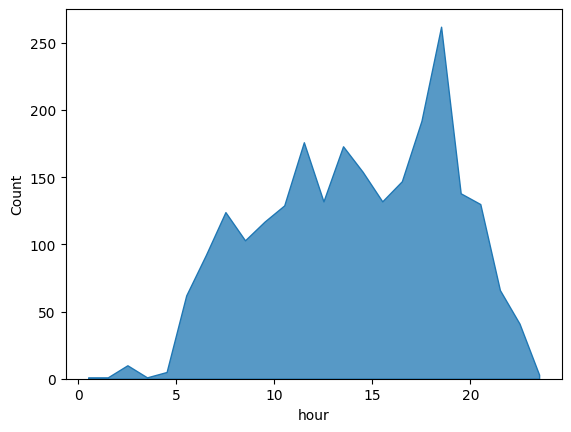

In [5]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

sb.histplot(data=df, x="hour", bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
            stat="count", element="poly" 
            )



Como curiosidad mostramos el histograma teniendo en cuenta el día de la semana.

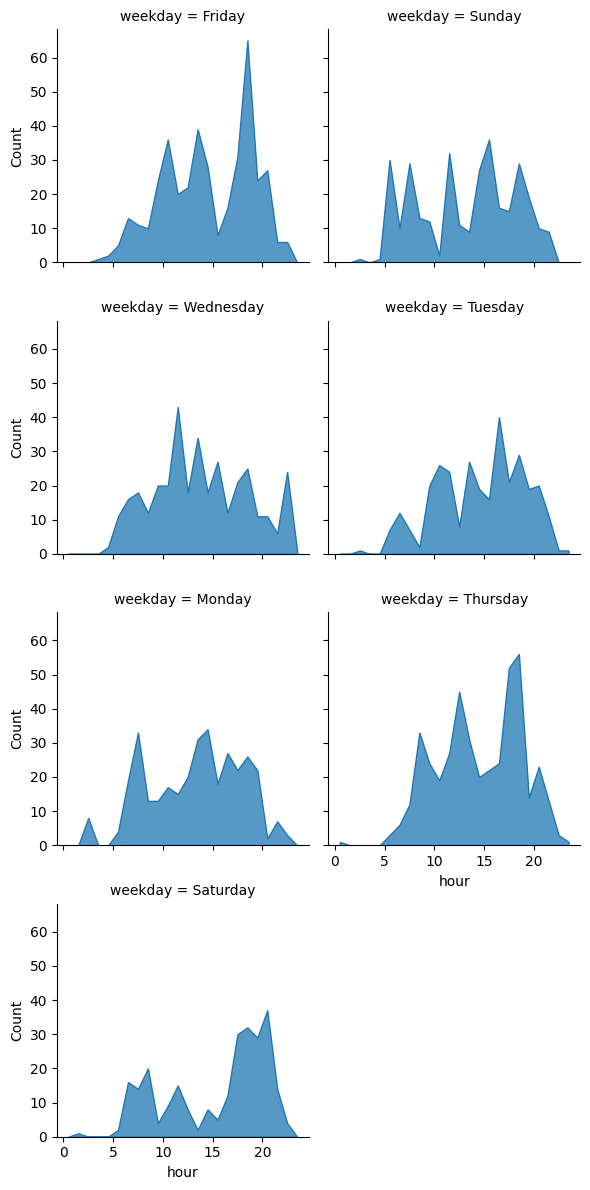

In [6]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

g = sb.FacetGrid(data=df, col='weekday', col_wrap=2)
g.map(sb.histplot, 'hour', bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
            stat="count", element="poly")
